## Jupyter Notebook Intro

If you have trouble running `juypter notebook`, try `python -m notebook`.

Pandas documentation: https://pandas.pydata.org/docs/user_guide/basics.html

In [3]:
print("Ready to analyze student grades!")

Ready to analyze student grades!


In [5]:
import pandas as pd

grades = pd.read_csv('data/student_grades.csv')  # generates a pandas DataFrame
print(type(grades))

grades.head()  # preview first bit of data in a long series

<class 'pandas.core.frame.DataFrame'>


,Name,Class,Grade
0,Alice,Math,88
1,Bob,Math,92
2,Charlie,Science,85
3,Dana,Math,76
4,Eli,Science,90


In [10]:
grades.info()  # metadata about the DataFrame object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Name    5 non-null      object
 1   Class   5 non-null      object
 2   Grade   5 non-null      int64 
dtypes: int64(1), object(2)
memory usage: 252.0+ bytes


In [11]:
grades.shape  # returns a doublet of (rows, columns) in the dataframe

(5, 3)

In [13]:
grades.describe() 

# a quick statistical overview of the data 
# including stuff like mean, median, std dev / percentiles, min max, etc. 

,Grade
count,5.00000
mean,86.20000
std,6.26099
min,76.00000
25%,85.00000
50%,88.00000
75%,90.00000
max,92.00000


In [16]:
# to filter by a column, I supply the name of the column

grades["Class"]

0       Math
1       Math
2    Science
3       Math
4    Science
Name: Class, dtype: object

In [17]:
# if I want deduplicated results, I call .unique() on it
# (once again, see intro docs: https://pandas.pydata.org/docs/user_guide/basics.html )

grades["Class"].unique()

array(['Math', 'Science'], dtype=object)

In [22]:
# filtration can take a value (like a column name), *or* an expression:

math_grades = grades[grades["Class"] == "Math"]

# this looks weird and complicated, but it's not:
# 1. rows, where
# 2. filtering by the class column,
# 3. the value in that column is "Math"

math_grades

,Name,Class,Grade
0,Alice,Math,88
1,Bob,Math,92
3,Dana,Math,76


In [23]:
# I can also sort data in a dataframe easily:

top_math = math_grades.sort_values(by="Grade", ascending=False)
top_math

,Name,Class,Grade
1,Bob,Math,92
0,Alice,Math,88
3,Dana,Math,76


In [24]:
# I can also use {dataframe}.iloc[n] similarly to how I would use {list}[n]:

top_math.iloc[0]

Name      Bob
Class    Math
Grade      92
Name: 1, dtype: object

In [30]:
# I can also group things together:

avg_by_class = grades.groupby("Class")["Grade"].mean()
avg_by_class
# 1. for a given dataframe,
# 2. group it by (in this case) the Class column,
# 3. then take the grade,
# 4. and get the mean/average

Class
Math       85.333333
Science    87.500000
Name: Grade, dtype: float64

In [26]:
# I can get counts of things:

count_by_class = grades["Class"].value_counts()
count_by_class

Class
Math       3
Science    2
Name: count, dtype: int64

Matplotlib is building the font cache; this may take a moment.


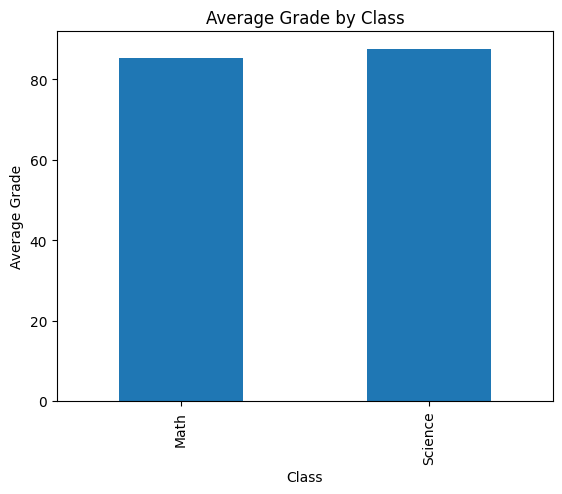

In [31]:
# now, we can plot stuff out with matplotlib!
# docs - https://matplotlib.org/stable/index.html

import matplotlib.pyplot as plt

# pandas and matplotlib play nicely together
avg_by_class.plot(kind="bar", title="Average Grade by Class")
plt.ylabel('Average Grade')  # we're configuring the plot by passing values into its methods
plt.show()